In [41]:
import uproot
import awkward as ak
import numpy as np
import time
import vector
vector.register_awkward()
import matplotlib.pyplot as plt
import hist

In [42]:
ttbar3 = uproot.open(("133b91e8-8baa-4f1e-9b51-f59d22ae124e.root"))["Events"]

In [43]:
arraytt3 = ttbar3.arrays()

In [44]:
tt3muon = ak.zip({
    "pt": arraytt3.Muon_pt,
    "eta": arraytt3.Muon_eta,
    "phi": arraytt3.Muon_phi,
    "mass": arraytt3.Muon_mass,
    "charge": arraytt3.Muon_charge
}, with_name="Momentum4D")

In [45]:
tt3pair = ak.combinations(tt3muon, 2)
tt3pair1, tt3pair2 = ak.unzip(tt3pair)
tt_os = (tt3pair1.charge + tt3pair2.charge) == 0

In [46]:
tt3_z_cand = tt3pair1[tt_os] + tt3pair2[tt_os]

In [47]:
tt3_z_mass = tt3_z_cand.mass
flat_tt3_mass = ak.flatten(tt3_z_mass)

In [48]:
jet_mask = (arraytt3.Jet_pt > 30) & (abs(arraytt3.Jet_eta) < 2.5)

In [49]:
tt3jets = ak.zip({"pt": arraytt3.Jet_pt,
                "eta": arraytt3.Jet_eta, 
                "phi": arraytt3.Jet_phi, 
                "mass": arraytt3.Jet_mass,
                "btag": arraytt3.Jet_btagDeepFlavB}, 
                with_name="Momentum4D")

In [50]:
sortedtt3jets = tt3jets[ak.argsort(tt3jets.pt, axis = -1, ascending=False)]
sortedtt3jets = sortedtt3jets[ak.num(sortedtt3jets) >= 2]

In [51]:
tt3_lead = sortedtt3jets[:, 0]
tt3_sub = sortedtt3jets[:, 1]

In [52]:
flat_tt3_pt = ak.flatten(tt3_z_cand.pt)
flat_tt3_phi = ak.flatten(tt3_z_cand.phi)
flat_tt3_eta = ak.flatten(tt3_z_cand.eta)

In [53]:
jet_btag = arraytt3.Jet_btagDeepFlavB
btag_score = jet_btag[jet_mask]
n_btagged = ak.sum(btag_score > 0.277, axis = 1)

In [54]:
z_mask = (tt3_z_cand.pt > 25) & (abs(tt3_z_cand.eta) < 2.5) & (n_btagged == 0)

In [55]:
jet_mask2 = jet_mask & (n_btagged == 0)

In [56]:
R2Jets = tt3jets[jet_mask2]
R2_z_cand = tt3_z_cand[z_mask]

In [57]:
sortedtt3R2jets = R2Jets[ak.argsort(R2Jets.pt, axis=1 , ascending=False)]
sortedtt3R2jets = sortedtt3R2jets[ak.num(sortedtt3R2jets) >= 2]

In [58]:
lead_R2 = sortedtt3R2jets[:, 0]
sub_R2 = sortedtt3R2jets[:, 1]

In [59]:
flat_r2_z_pt = ak.flatten(R2_z_cand.pt)
flat_r2_z_phi = ak.flatten(R2_z_cand.phi)
flat_r2_z_eta = ak.flatten(R2_z_cand.eta)
flat_r2_z_mass = ak.flatten(R2_z_cand.mass)

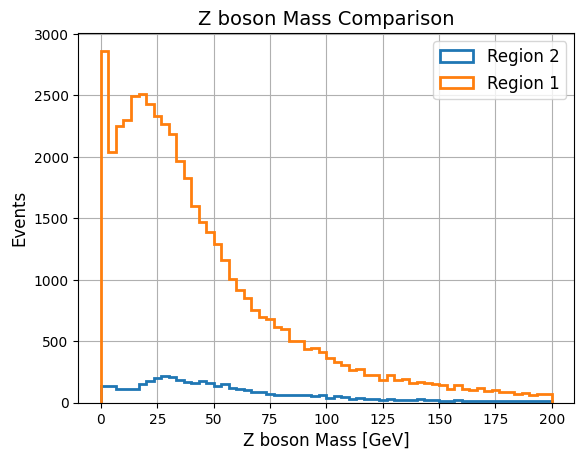

In [60]:
plt.hist(flat_r2_z_mass, bins=60, range=(0,200), histtype="step", linewidth=2, label="Region 2")
plt.hist(flat_tt3_mass, bins=60, range=(0,200), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Z boson Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z boson Mass Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

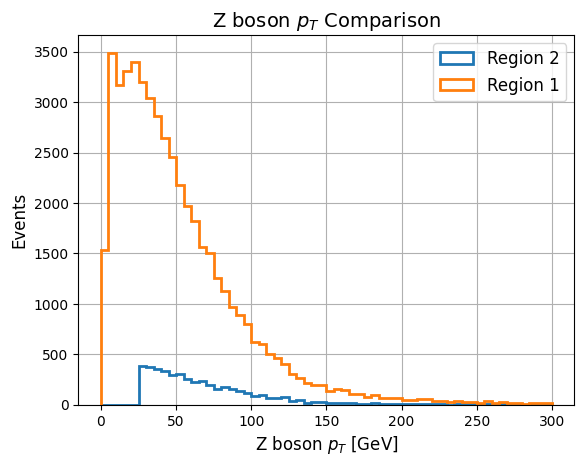

In [61]:
plt.hist(flat_r2_z_pt, bins=60, range=(0,300), histtype="step", linewidth=2, label="Region 2")
plt.hist(flat_tt3_pt, bins=60, range=(0,300), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Z boson $p_T$ [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z boson $p_T$ Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

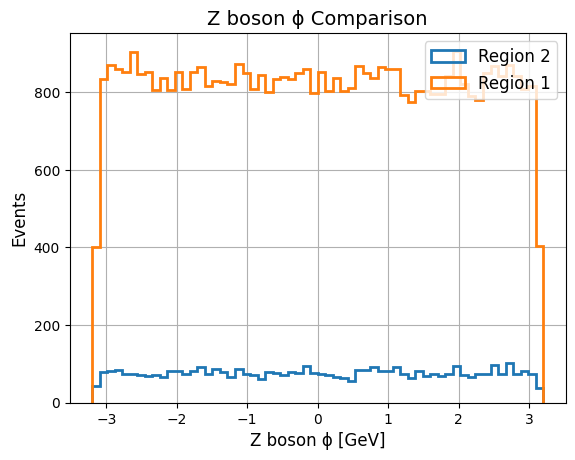

In [62]:
plt.hist(flat_r2_z_phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Region 2")
plt.hist(flat_tt3_phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Z boson ϕ [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z boson ϕ Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

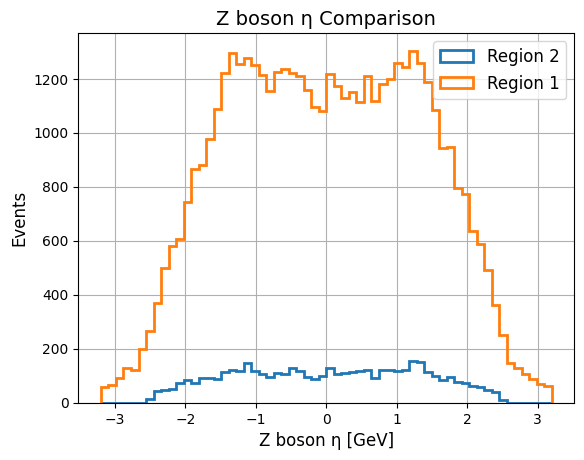

In [63]:
plt.hist(flat_r2_z_eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Region 2")
plt.hist(flat_tt3_eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Z boson η [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z boson η Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

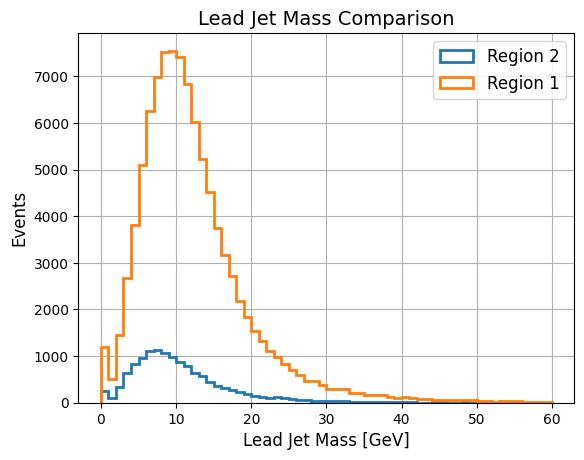

In [64]:
plt.hist(lead_R2.mass, bins=60, range=(0,60), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt3_lead.mass, bins=60, range=(0,60), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Lead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Mass Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

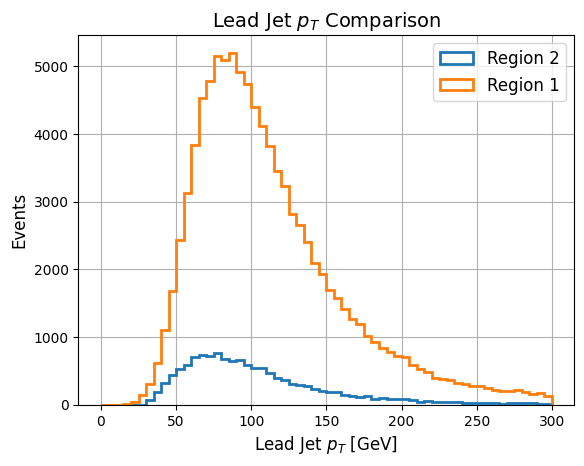

In [65]:
plt.hist(lead_R2.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt3_lead.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Lead Jet $p_T$ [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet $p_T$ Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

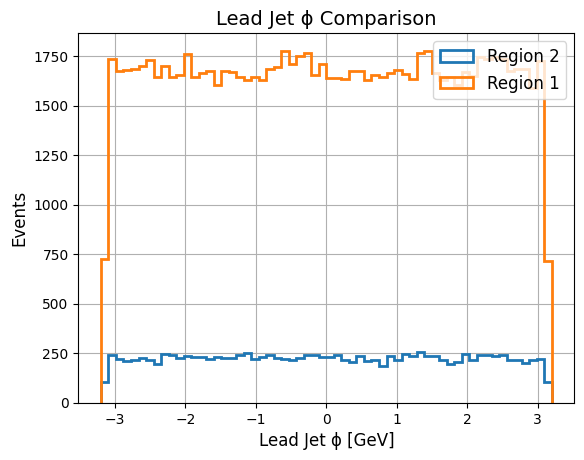

In [66]:
plt.hist(lead_R2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt3_lead.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Lead Jet ϕ [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet ϕ Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

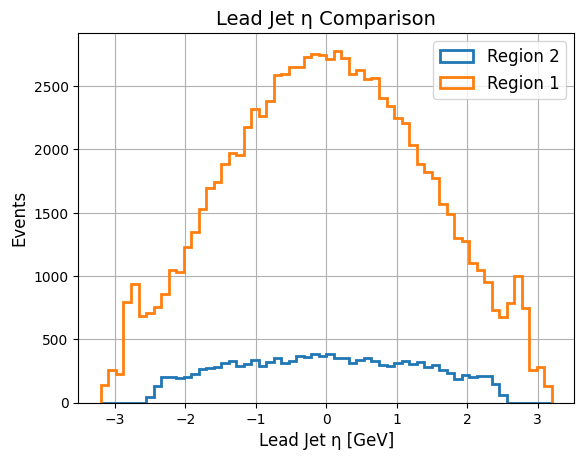

In [67]:
plt.hist(lead_R2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt3_lead.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Lead Jet η [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet η Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

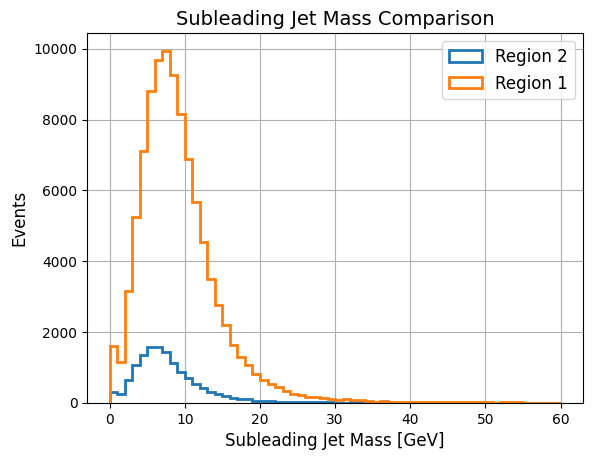

In [68]:
plt.hist(sub_R2.mass, bins=60, range=(0,60), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt3_sub.mass, bins=60, range=(0,60), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Subleading Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Subleading Jet Mass Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

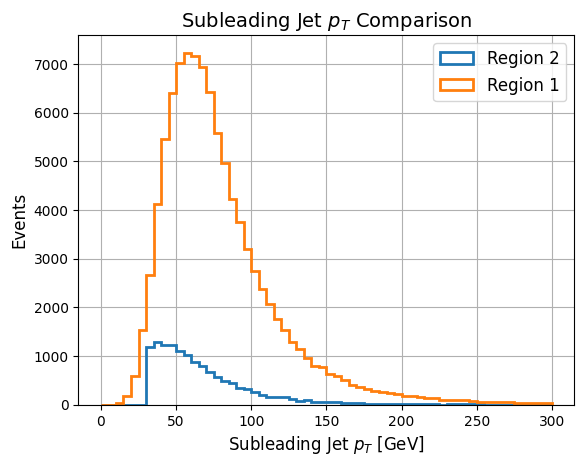

In [69]:
plt.hist(sub_R2.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt3_sub.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Subleading Jet $p_T$ [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Subleading Jet $p_T$ Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

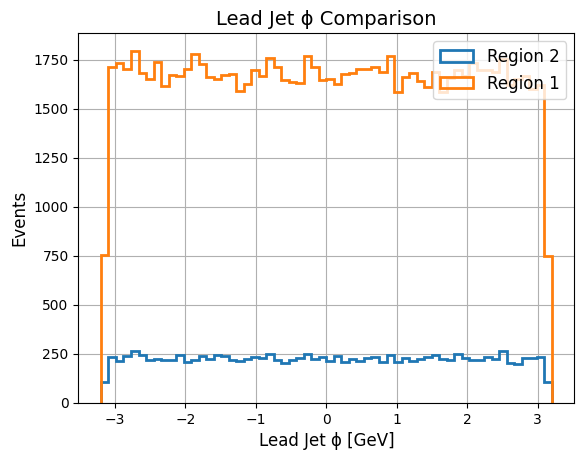

In [70]:
plt.hist(sub_R2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt3_sub.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Lead Jet ϕ [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet ϕ Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

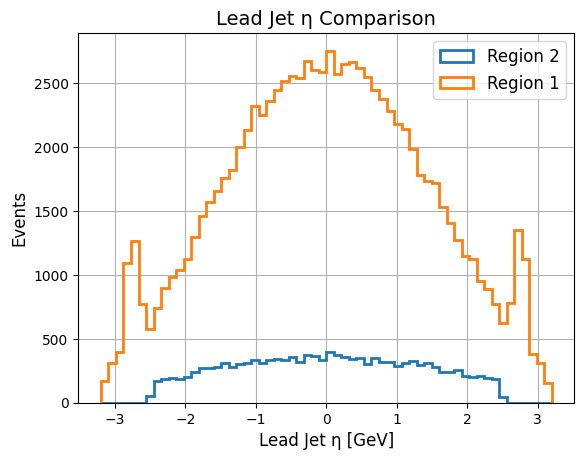

In [71]:
plt.hist(sub_R2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Region 2")
plt.hist(tt3_sub.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='Region 1')
plt.grid(True)
plt.xlabel("Lead Jet η [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet η Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

In [ ]:
#----------------------------

In [84]:
dy3 = uproot.open(("04192c07-dcaa-4cb6-ae8f-755665f8715a.root"))["Events"]

In [85]:
arraydy3 = dy3.arrays()

In [86]:
dy3muons = ak.zip({"pt": arraydy3.Muon_pt,
                "eta": arraydy3.Muon_eta, 
                "phi": arraydy3.Muon_phi, 
                "mass": arraydy3.Muon_mass,
                "charge": arraydy3.Muon_charge}, 
                with_name="Momentum4D")

In [87]:
pairdy3 = ak.combinations(dy3muons, 2)
dy3pair1, dy3pair2 = ak.unzip(pairdy3) 

In [88]:
dy3_os = (dy3pair1.charge + dy3pair2.charge) == 0

In [89]:
dy3_z_cand = dy3pair1[dy3_os] + dy3pair2[dy3_os]

In [90]:
dy3_z_mass = dy3_z_cand.mass
flatdy3mass = ak.flatten(dy3_z_mass)

In [92]:
flatdy3pt = ak.flatten(dy3_z_cand.pt)
flatdy3phi = ak.flatten(dy3_z_cand.phi)
flatdy3eta = ak.flatten(dy3_z_cand.eta)

In [93]:
jet_mask = (arraydy3.Jet_pt > 30) & (abs(arraydy3.Jet_eta) < 2.5)

In [94]:
dy3jets = ak.zip({"pt": arraydy3.Jet_pt,
                "eta": arraydy3.Jet_eta, 
                "phi": arraydy3.Jet_phi, 
                "mass": arraydy3.Jet_mass,
                "btag": arraydy3.Jet_btagDeepFlavB}, 
                with_name="Momentum4D")

In [95]:
sortdy3jets = dy3jets[ak.argsort(dy3jets.pt, axis=-1, ascending=False)]
sortdy3jets = sortdy3jets[ak.num(sortdy3jets) >= 2]

In [96]:
dy3_lead = sortdy3jets[:, 0]
dy3_sub = sortdy3jets[:, 1]

In [97]:
jet_btag = arraydy3.Jet_btagDeepFlavB
btag_score = jet_btag[jet_mask]
n_btagged = ak.sum(btag_score > 0.277, axis = 1)

In [98]:
z_mask = (dy3_z_cand.pt > 25) & (abs(dy3_z_cand.eta) < 2.5) & (n_btagged == 0)

In [99]:
jet_mask3 = (jet_mask) & (n_btagged == 0)

In [100]:
dy3_R2Jets = dy3jets[jet_mask3]
dy3_R2_Z_cand = dy3_z_cand[z_mask]

In [101]:
sortdy3R2jets = dy3_R2Jets[ak.argsort(dy3_R2Jets.pt, axis=1 , ascending=False)]
sortdy3R2jets = sortdy3R2jets[ak.num(sortdy3R2jets) >= 2]

In [102]:
dy3_lead_R2 = sortdy3R2jets[:, 0]
dy3_sub_R2 = sortdy3R2jets[:, 1]

In [103]:
dy3_flat_r2_z_pt = ak.flatten(dy3_R2_Z_cand.pt)
dy3_flat_r2_z_phi = ak.flatten(dy3_R2_Z_cand.phi)
dy3_flat_r2_z_eta = ak.flatten(dy3_R2_Z_cand.eta)
dy3_flat_r2_z_mass = ak.flatten(dy3_R2_Z_cand.mass)

In [ ]:
#--------------------------

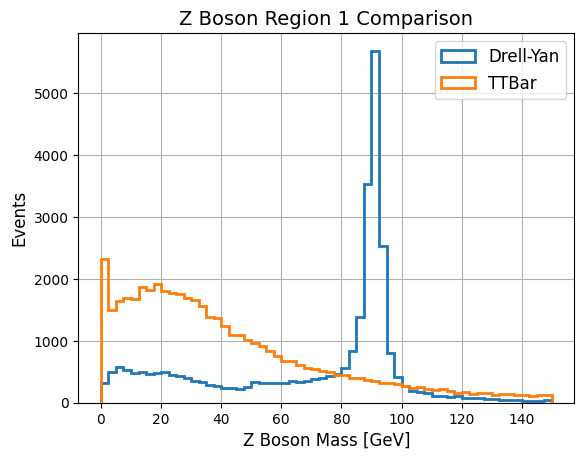

In [105]:
plt.hist(flatdy3mass, bins=60, range=(0,150), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_tt3_mass, bins=60, range=(0,150), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

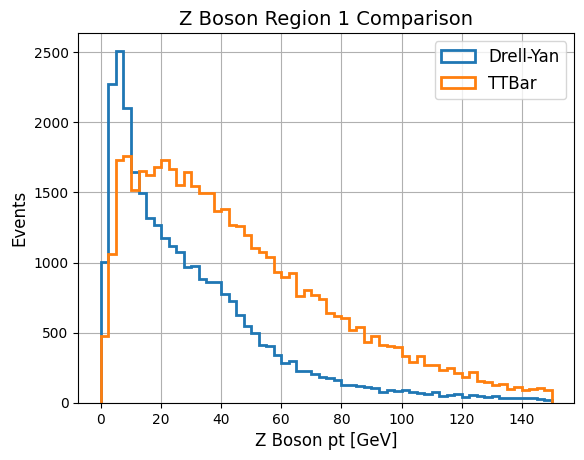

In [106]:
plt.hist(flatdy3pt, bins=60, range=(0,150), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_tt3_pt, bins=60, range=(0,150), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson pt [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

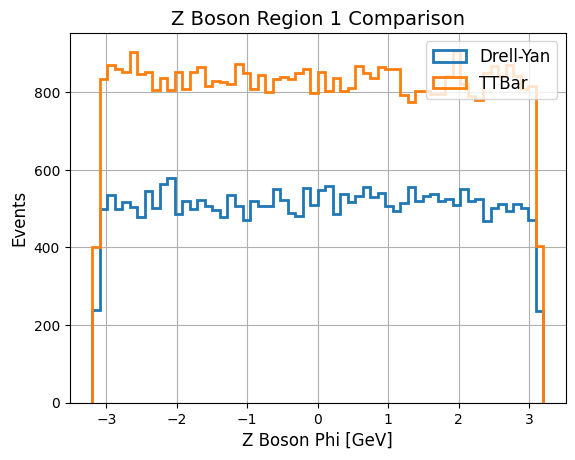

In [107]:
plt.hist(flatdy3phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_tt3_phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Phi [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

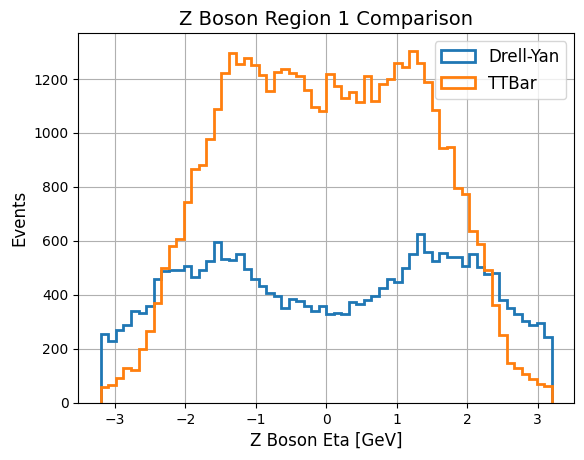

In [108]:
plt.hist(flatdy3eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_tt3_eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Eta [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

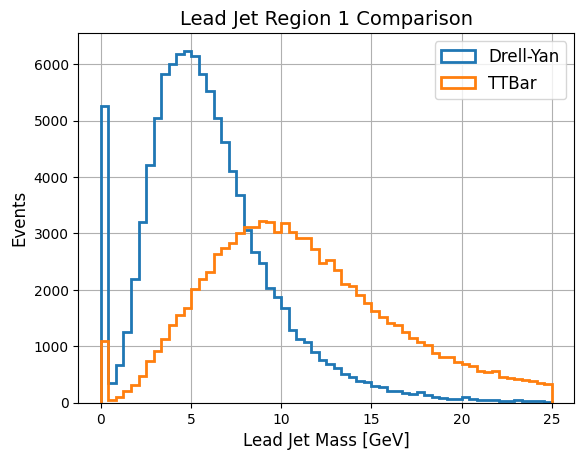

In [109]:
plt.hist(dy3_lead.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt3_lead.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

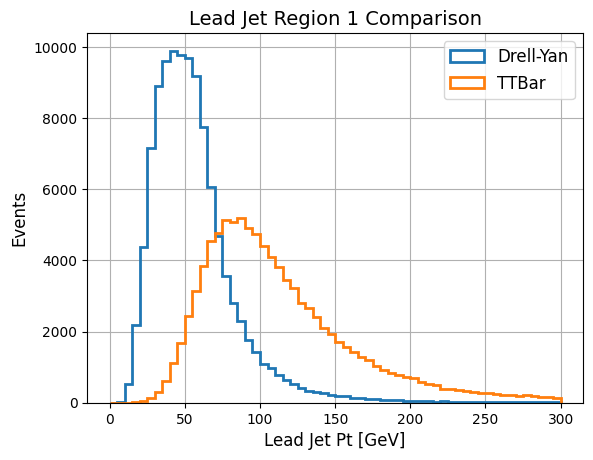

In [110]:
plt.hist(dy3_lead.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt3_lead.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Pt [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

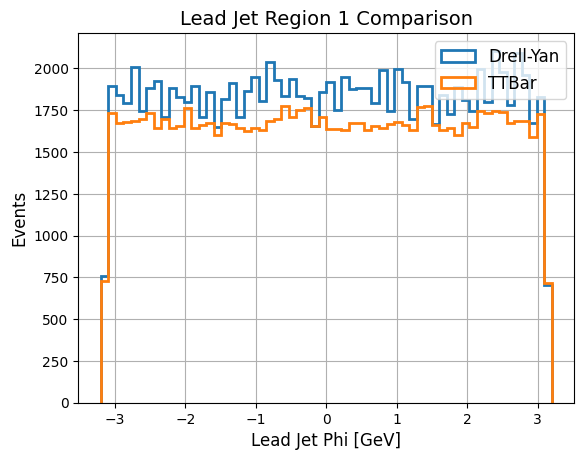

In [111]:
plt.hist(dy3_lead.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt3_lead.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Phi [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

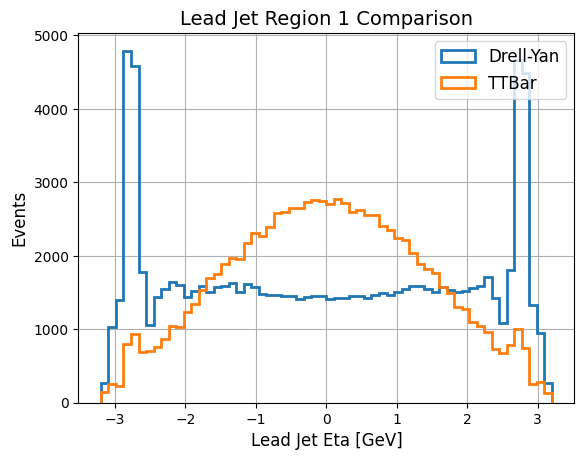

In [112]:
plt.hist(dy3_lead.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt3_lead.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Eta [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

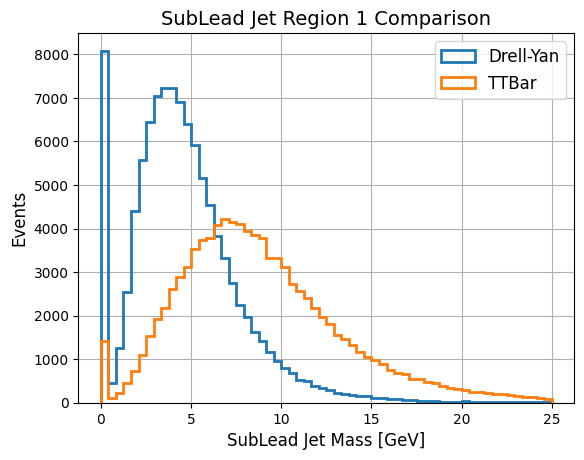

In [113]:
plt.hist(dy3_sub.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt3_sub.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

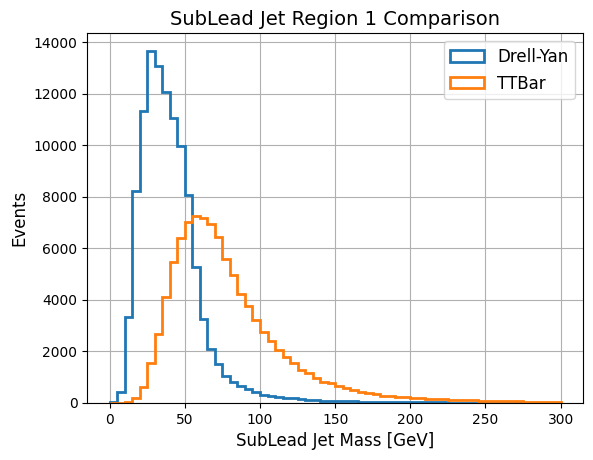

In [114]:
plt.hist(dy3_sub.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt3_sub.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

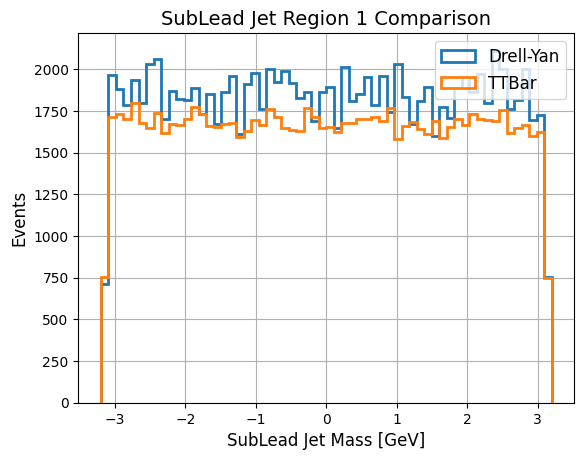

In [115]:
plt.hist(dy3_sub.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt3_sub.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

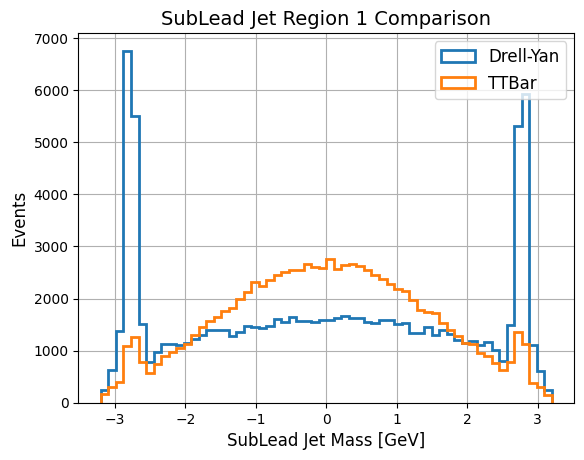

In [116]:
plt.hist(dy3_sub.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(tt3_sub.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 1 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

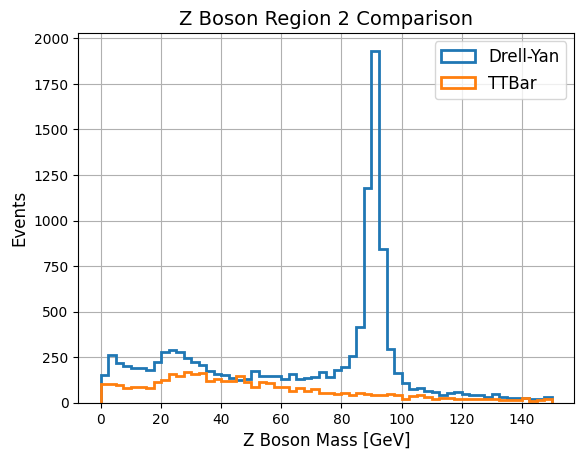

In [117]:
plt.hist(dy3_flat_r2_z_mass, bins=60, range=(0,150), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_r2_z_mass, bins=60, range=(0,150), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

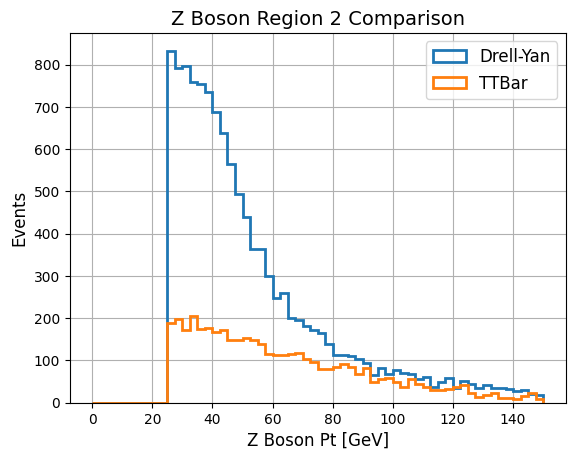

In [118]:
plt.hist(dy3_flat_r2_z_pt, bins=60, range=(0,150), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_r2_z_pt, bins=60, range=(0,150), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Pt [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

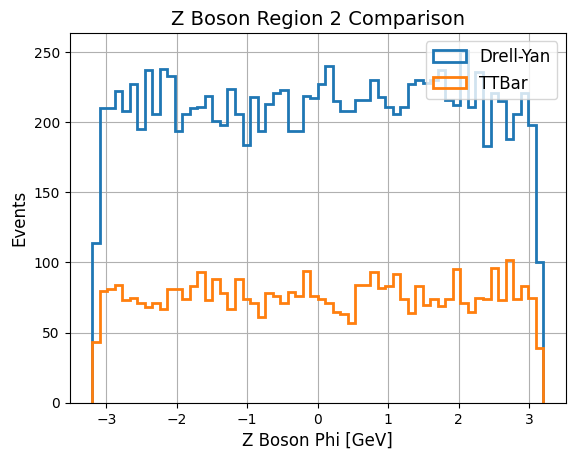

In [119]:
plt.hist(dy3_flat_r2_z_phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_r2_z_phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Phi [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

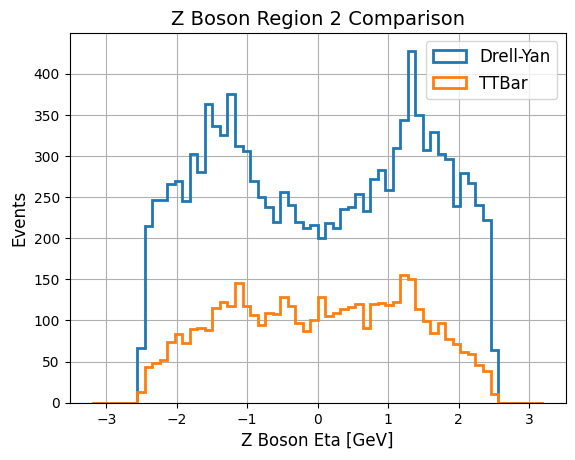

In [120]:
plt.hist(dy3_flat_r2_z_eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(flat_r2_z_eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Z Boson Eta [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Z Boson Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

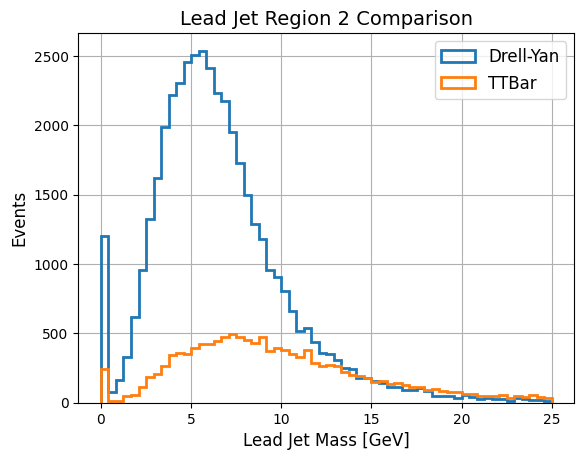

In [121]:
plt.hist(dy3_lead_R2.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(lead_R2.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

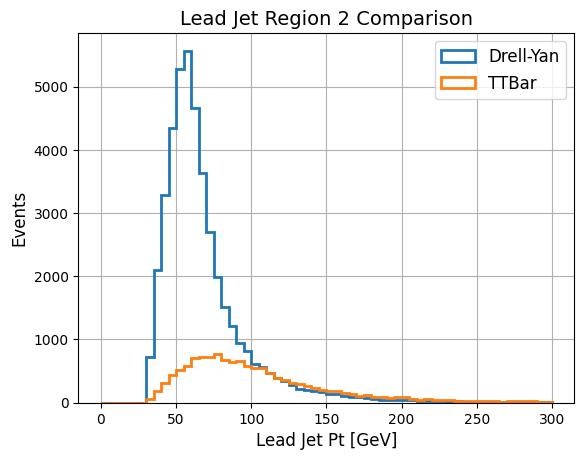

In [122]:
plt.hist(dy3_lead_R2.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(lead_R2.pt, bins=60, range=(0,300), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Pt [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

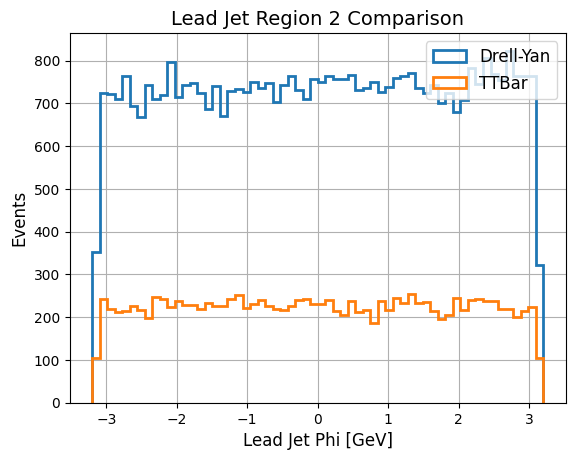

In [123]:
plt.hist(dy3_lead_R2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(lead_R2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Phi [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

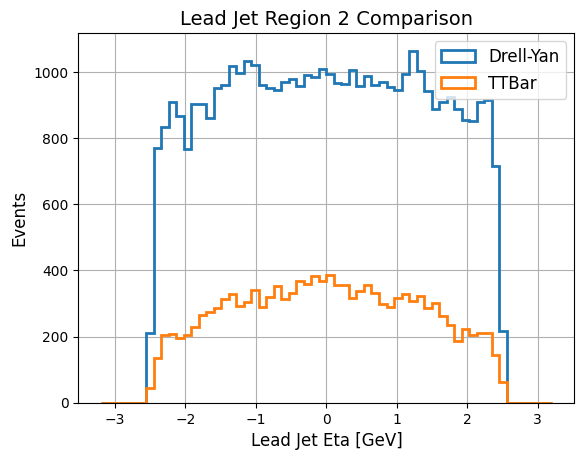

In [124]:
plt.hist(dy3_lead_R2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(lead_R2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("Lead Jet Eta [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("Lead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

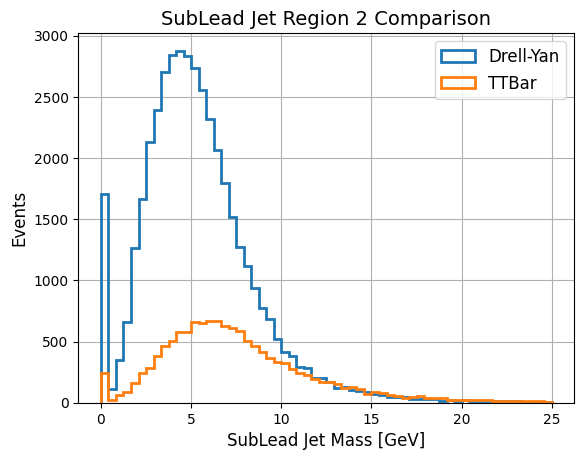

In [125]:
plt.hist(dy3_sub_R2.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(sub_R2.mass, bins=60, range=(0,25), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Mass [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

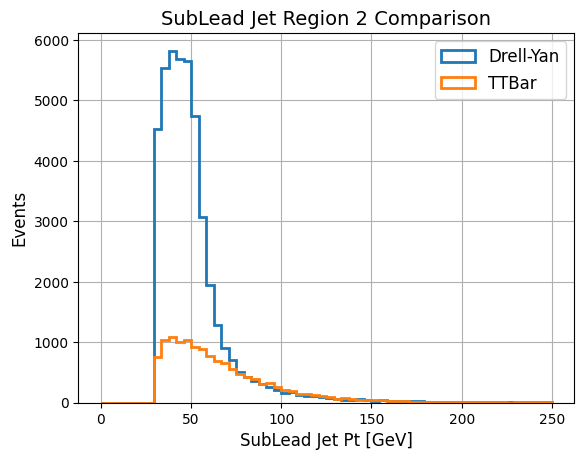

In [126]:
plt.hist(dy3_sub_R2.pt, bins=60, range=(0,250), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(sub_R2.pt, bins=60, range=(0,250), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Pt [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

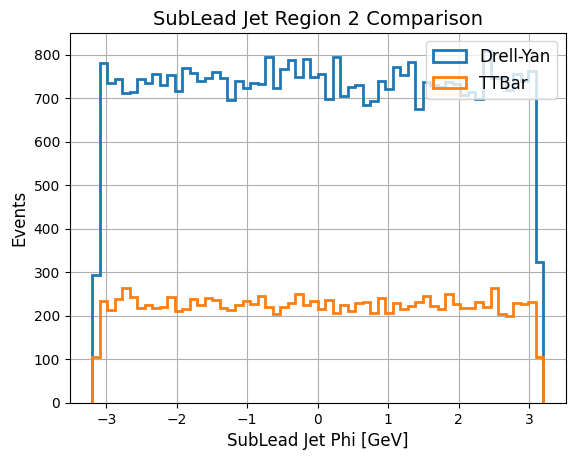

In [127]:
plt.hist(dy3_sub_R2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(sub_R2.phi, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Phi [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()

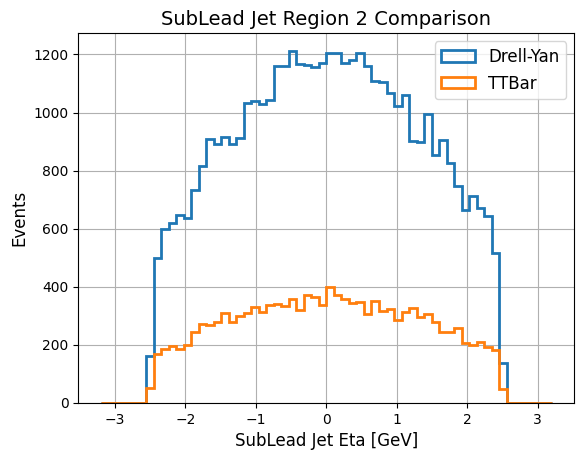

In [129]:
plt.hist(dy3_sub_R2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label="Drell-Yan")
plt.hist(sub_R2.eta, bins=60, range=(-3.2,3.2), histtype="step", linewidth=2, label='TTBar')
plt.grid(True)
plt.xlabel("SubLead Jet Eta [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.title("SubLead Jet Region 2 Comparison", fontsize=14)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.show()